In [1]:
#03/03/2020
#Seattle Data Stories - New Mobility Story
#Who is using ride-hailing apps,carsharing services, and home delivery services?
#Data Used: PSRC HHTS 2019

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
#Loading the data
import pandas as pd
import pyodbc
# File names and directories
survey_dir = 'J:/Projects/Surveys/HHTravel/Survey2019/Data/PSRC_2019_HTS_RSG_Final_Deliverable/'
hh_file_name = '1_Household.csv'
person_file_name = '2_Person.csv'
vehicle_file_name = '3_Vehicle.csv'
day_file_name = '4_Day.csv'
trip_file_name = '5_Trip.csv'

#sql_conn = pyodbc.connect('DRIVER={SQL Server}; SERVER=AWS-PROD-SQL\COHO;DATABASE=HouseholdTravelSurvey2019;trusted_connection=true')
#trip_table_name = "HHSurvey.Trip"
#trip  = pd.read_sql('SELECT * FROM '+trip_table_name, con = sql_conn)

hh_weight_2017 = 'hh_wt_revised'
hh_weight_2019 = 'hh_wt_2019'
hh_weight_combined = 'hh_wt_combined'
hh_weight_names =[hh_weight_2017, hh_weight_2019, hh_weight_combined]

day_weight_2017 = 'hh_day_wt_revised'
day_weight_2019 = 'hh_day_wt_2019'
day_weight_combined = 'hh_day_wt_combined'
day_weight_names =[day_weight_2017, day_weight_2019, day_weight_combined]

trip_weight_2017 = 'trip_weight_revised'
trip_weight_2019 ='trip_wt_2019'
trip_weight_combined = 'trip_wt_combined'
trip_weight_names =[trip_weight_2017, trip_weight_2019, trip_weight_combined]

codebook_file = 'Combined_Codebook_022020.xlsx'
output_file_hh = 'C:/Users/pbutrina/Documents/GitHub/travel-studies/2019/summary/hh_summary.xlsx'
output_file_person= 'C:/Users/pbutrina/Documents/GitHub/travel-studies/2019/summary/person_summary.xlsx'
output_file_day= 'C:/Users/pbutrina/Documents/GitHub/travel-studies/2019/summary/day_summary.xlsx'
output_file_trip= 'C:/Users/pbutrina/Documents/GitHub/travel-studies/2019/summary/trip_summary.xlsx'

In [3]:
def merge_hh_person_trip(hh,person,trip):
    hh_person =pd.merge(hh, person, on= 'hhid', suffixes=['', 'person'], how ='right')
    hh_person_trip = pd.merge(hh_person, trip,on='personid', suffixes=['','trip'], how ='right')
    return hh_person_trip

def merge_hh_person(hh, person):
    hh_person =pd.merge(hh, person, on= 'hhid', suffixes=['', 'person'], how ='right')
    return hh_person


In [4]:
hh = pd.read_csv(survey_dir+hh_file_name, encoding = 'latin-1')
person= pd.read_csv(survey_dir+person_file_name, encoding = 'latin-1')
trip = pd.read_csv(survey_dir+trip_file_name, encoding = 'latin-1')
day= pd.read_csv(survey_dir+day_file_name, encoding='latin-1')

C:\Users\pbutrina\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,44,45,53,56,57,65,72,73,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pbutrina\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,10,11,20,24,37,39,106,112,118,120,121,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pbutrina\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14,15,21,23,34,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
codebook_values = pd.read_excel(survey_dir+codebook_file, sheet_name='Values')
codebook_variables =pd.read_excel(survey_dir+codebook_file, sheet_name='Data Overview')

In [6]:
person_detail = merge_hh_person(hh, person)
trip_detail = merge_hh_person_trip(hh, person, trip)

In [7]:
def lookup_codes(grouped_total, item,name):
    values=codebook_values.loc[codebook_values['variable']==item]
    variable =codebook_variables.loc[codebook_variables['variable']==item, 'description'].values[0]
    missing_values_df = pd.DataFrame({'variable': [item, item, item],'value':[-9999,-9998, 995], 'label':
                                         ['Missing:Technical Error', 'Missing: Non-response', 'Missing:Skip logic']})
    values = values.append(missing_values_df)
    summary=pd.merge(values, grouped_total,left_on='value', right_on=item)
    summary[item+'_variable']=variable
    summary = summary.rename(columns = {'label':name, 'value':name+'_value'})
    return summary

In [8]:
#Choose PUMAs that are located in Seattle
person_detail_Seattle = person_detail[(person_detail["final_home_puma10"] >= 11601) & (person_detail["final_home_puma10"] <= 11605)] 

In [9]:
#Checking number of rows in every PUMA selected to see if it matches raw data (it should match)
person_detail_Seattle.groupby(['final_home_puma10']).count()

,recid,hhid,survey_year,cityofredmond,cityofseattle,psrc,hhgroup,sample_segment,sample_lat,sample_lng,...,num_tripsperson,nwkdaysperson,hh_wt_revisedperson,hh_day_wt_revisedperson,initial_expansion_factor_combinedperson,hh_wt_combinedperson,initial_expansion_factor_2019person,hh_wt_2019person,hh_day_wt_combinedperson,hh_day_wt_2019person
final_home_puma10,,,,,,,,,,,,,,,,,,,,,
11601,758,1562,1562,804,1562,1562,1562,1562,758,758,...,1562,1562,800,800,1562,1562,1562,1562,1562,1562
11602,461,1129,1129,668,1129,1129,1129,1129,461,461,...,1129,1129,668,668,1129,1129,1129,1129,1129,1129
11603,1045,1908,1908,863,1908,1908,1908,1908,1045,1045,...,1908,1908,863,863,1908,1908,1908,1908,1908,1908
11604,624,1201,1201,577,1201,1201,1201,1201,624,624,...,1201,1201,577,577,1201,1201,1201,1201,1201,1201
11605,503,1038,1038,535,1038,1038,1038,1038,503,503,...,1038,1038,535,535,1038,1038,1038,1038,1038,1038


In [10]:
#The share of all people who is using ride-hailing
person_detail_df = lookup_codes(person_detail_Seattle,'mode_freq_5','TNC_Freq')
tnc_freq_seattle =person_detail_df.groupby(['TNC_Freq']).sum()['hh_wt_2019'].reset_index()

In [22]:
person_detail_df = lookup_codes(person_detail_Seattle,'mode_freq_5',"TNC_Freq")
person_detail_df

,variable,TNC_Freq_value,TNC_Freq,recid,hhid,survey_year,cityofredmond,cityofseattle,psrc,hhgroup,...,nwkdaysperson,hh_wt_revisedperson,hh_day_wt_revisedperson,initial_expansion_factor_combinedperson,hh_wt_combinedperson,initial_expansion_factor_2019person,hh_wt_2019person,hh_day_wt_combinedperson,hh_day_wt_2019person,mode_freq_5_variable
0,mode_freq_5,1,6-7 days/week,NaN,17100834,2017,0.0,1,0,1,...,1,7.112845,7.112845,13.208121,47.189962,0.000000,0.000000,47.189962,0.000000,Times used rideshare in past 30 days
1,mode_freq_5,1,6-7 days/week,NaN,17100957,2017,0.0,1,0,2,...,1,50.580761,50.580761,86.469251,21.864786,0.000000,0.000000,21.864786,0.000000,Times used rideshare in past 30 days
2,mode_freq_5,1,6-7 days/week,NaN,17116572,2017,0.0,1,0,2,...,1,6.454744,6.454744,7.422187,16.206304,0.000000,0.000000,16.206304,0.000000,Times used rideshare in past 30 days
3,mode_freq_5,1,6-7 days/week,NaN,17126013,2017,0.0,1,0,1,...,4,25.074854,6.268714,47.543561,19.773195,0.000000,0.000000,4.943299,0.000000,Times used rideshare in past 30 days
4,mode_freq_5,1,6-7 days/week,NaN,17128073,2017,0.0,1,0,2,...,1,29.037464,29.037464,46.361112,230.305473,0.000000,0.000000,230.305473,0.000000,Times used rideshare in past 30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6399,mode_freq_5,995,Missing:Skip logic,3052.0,191005786,2019,NaN,1,0,1,...,3,NaN,NaN,46.880854,11.898844,97.319355,24.607267,3.966281,8.202422,Times used rideshare in past 30 days
6400,mode_freq_5,995,Missing:Skip logic,3061.0,191006149,2019,NaN,1,0,1,...,4,NaN,NaN,46.880854,11.720213,97.319355,24.535368,2.930053,6.133842,Times used rideshare in past 30 days
6401,mode_freq_5,995,Missing:Skip logic,3061.0,191006149,2019,NaN,1,0,1,...,4,NaN,NaN,46.880854,11.720213,97.319355,24.535368,2.930053,6.133842,Times used rideshare in past 30 days
6402,mode_freq_5,995,Missing:Skip logic,3076.0,191038667,2019,NaN,1,0,1,...,4,NaN,NaN,46.880854,17.113307,97.319355,24.590807,4.278327,6.147702,Times used rideshare in past 30 days


In [11]:
tnc_freq_seattle

,TNC_Freq,hh_wt_2019
0,1 day/week,39164.444586
1,1-3 times in the past 30 days,140916.171474
2,2-4 days/week,33729.458291
3,5 days/week,2474.380673
4,6-7 days/week,1439.210976
5,"I do this, but not in the past 30 days",101454.839052
6,I never do this,271559.160720
7,Missing: Non-response,2047.892069
8,Missing:Skip logic,106012.442159


In [12]:
tnc_freq_seattle['Share'] = 0
for i in range(0,len(tnc_freq_seattle.index)):
    tnc_freq_seattle.iloc[i,2] =tnc_freq_seattle.iloc[i,1]/ (tnc_freq_seattle['hh_wt_2019'].sum())*100

In [13]:
tnc_freq_seattle.sort_values(by=['Share'], inplace=True, ascending=False)
tnc_freq_seattle

,TNC_Freq,hh_wt_2019,Share
6,I never do this,271559.160720,38.860896
1,1-3 times in the past 30 days,140916.171474,20.165509
8,Missing:Skip logic,106012.442159,15.170685
5,"I do this, but not in the past 30 days",101454.839052,14.518479
0,1 day/week,39164.444586,5.604544
2,2-4 days/week,33729.458291,4.826782
3,5 days/week,2474.380673,0.354091
7,Missing: Non-response,2047.892069,0.293059
4,6-7 days/week,1439.210976,0.205955


Text(0.5, 1.0, 'Data Source: PSRC HHTS 2019')

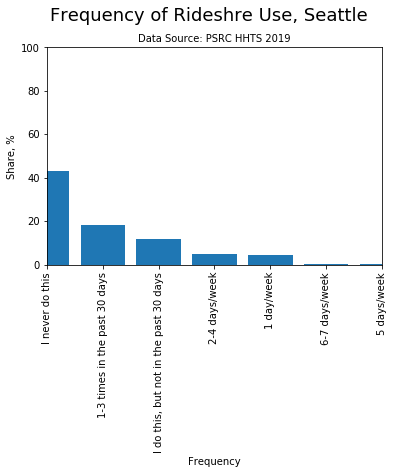

In [20]:
#Visualization
plt.bar(tnc_freq_seattle["TNC_Freq"],tnc_freq_seattle["Share"])
plt.axis([0, 6, 0, 100])
plt.xticks(rotation=90)
plt.xlabel('Frequency')
plt.ylabel('Share, %')
#plt.title("TNC Frequency, Seattle\nData Source: PSRC HHTS 2019")
title = "Frequency of Rideshre Use, Seattle"
subtitle = "Data Source: PSRC HHTS 2019"
plt.suptitle(title, y=1.02, fontsize=18)
plt.title(subtitle, fontsize=10)

In [ ]:
tnc_freq_seattle

In [19]:
tnc_freq_seattle=tnc_freq_seattle[tnc_freq_seattle.TNC_Freq != 'Missing:Skip logic']
tnc_freq_seattle=tnc_freq_seattle[tnc_freq_seattle.TNC_Freq != 'Missing: Non-response']

In [ ]:
#grouped by gender

In [21]:
person_detail_df = lookup_codes(person_detail_df,'gender',"Gender")
#person_detail_df =person_detail_df.rename(columns = {'label_x':'Gender', 'label_y':'TNC_Freq'})
tnc_gender_seattle =person_detail_df.groupby(['TNC_Freq','Gender']).sum()['hh_wt_2019'].reset_index()

In [22]:
tnc_gender_seattle

,TNC_Freq,Gender,hh_wt_2019
0,1 day/week,Another,305.103199
1,1 day/week,Female,9804.810409
2,1 day/week,Male,20868.177324
3,1 day/week,Prefer not to answer,66.162356
4,1-3 times in the past 30 days,Another,313.278613
5,1-3 times in the past 30 days,Female,66232.272487
6,1-3 times in the past 30 days,Male,61591.314952
7,1-3 times in the past 30 days,Prefer not to answer,589.244198
8,2-4 days/week,Another,25.946069
9,2-4 days/week,Female,16955.429595


In [23]:
tnc_gender_seattle['Share'] = 0
for i in range(0,len(tnc_gender_seattle.index)):
    tnc_gender_seattle.iloc[i,3] =tnc_gender_seattle.iloc[i,2]/ (tnc_gender_seattle['hh_wt_2019'].sum())*100

In [24]:
tnc_gender_seattle.sort_values(by=['TNC_Freq'], inplace=True, ascending=False)
tnc_gender_seattle

,TNC_Freq,Gender,hh_wt_2019,Share
31,Missing:Skip logic,Prefer not to answer,1595.867207,0.228373
30,Missing:Skip logic,Male,47696.454489,6.825500
29,Missing:Skip logic,Female,61203.439960,8.758388
28,Missing:Skip logic,Another,101.205677,0.014483
27,Missing: Non-response,Male,512.019131,0.073271
26,Missing: Non-response,Female,655.175391,0.093757
25,I never do this,Prefer not to answer,7853.625373,1.123876
24,I never do this,Male,171008.218122,24.471767
23,I never do this,Female,122558.957386,17.538539
22,I never do this,Another,994.845054,0.142365


In [25]:
#viz function - generates graphics based on the two columns and the title
def vis_share(column1, column2, title):
    #Visualization
    plt.bar(column1,column2)
    plt.axis([0, 6, 0, 100])
    plt.xticks(rotation=90)
    plt.xlabel('Frequency')
    plt.ylabel('Share, %')
    subtitle = "Data Source: PSRC HHTS 2019"
    plt.suptitle(title, y=1.02, fontsize=18)
    plt.title(subtitle, fontsize=10)


In [26]:
#vis_share(tnc_gender_seattle["label"],tnc_freq_seattle["Share"],"Frequency of Rideshre Use, Seattle")

In [27]:
tnc_gender_seattle1

NameError: name 'tnc_gender_seattle1' is not defined

In [28]:
tnc_gender_seattle1=tnc_gender_seattle[tnc_gender_seattle.Gender != 'Prefer not to answer']
tnc_gender_seattle1=tnc_gender_seattle1[tnc_gender_seattle1.TNC_Freq != 'Missing:Skip logic']
tnc_gender_seattle1=tnc_gender_seattle1[tnc_gender_seattle1.TNC_Freq != 'Missing: Non-response']

In [29]:
tnc_gender_seattle1.pivot("TNC_Freq","Gender","Share")

Gender,Another,Female,Male
TNC_Freq,,,
1 day/week,0.043661,1.403097,2.986296
1-3 times in the past 30 days,0.044831,9.478028,8.813894
2-4 days/week,0.003713,2.426371,2.707628
5 days/week,NaN,0.160062,0.096866
6-7 days/week,0.000000,0.142829,0.185720
"I do this, but not in the past 30 days",0.186165,7.613706,4.021884
I never do this,0.142365,17.538539,24.471767


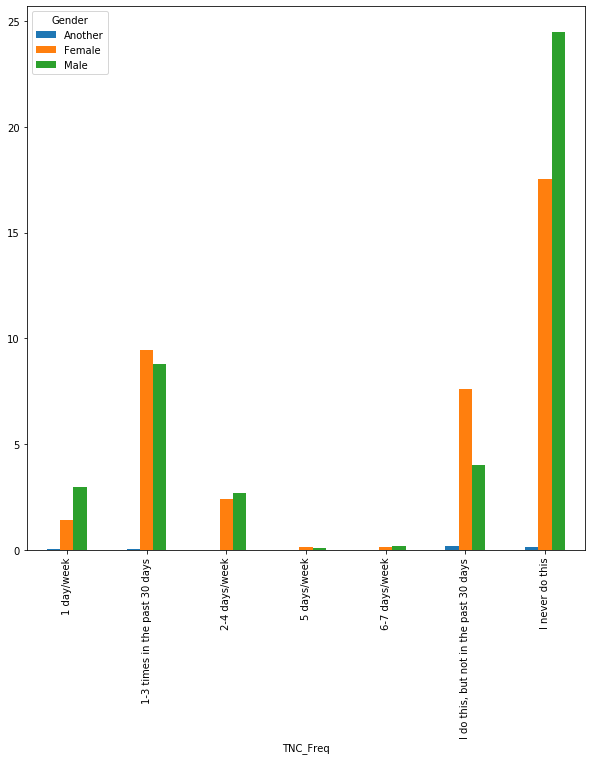

In [30]:
tnc_gender_seattle1.pivot("TNC_Freq","Gender","Share").plot.bar(figsize=(10, 10))

In [31]:
# income
person_detail_df = lookup_codes(person_detail_Seattle,'mode_freq_5','TNC_Freq')
person_detail_df2 = lookup_codes(person_detail_df,'hhincome_broad','Income')
#person_detail_df2 =person_detail_df2.rename(columns = {'label_x':'Income', 'label_y':'TNC_Freq'})
tnc_income_seattle =person_detail_df2.groupby(['Income','TNC_Freq']).sum()['hh_wt_2019'].reset_index()
tnc_income_seattle['Share'] = 0
for i in range(0,len(tnc_income_seattle.index)):
    tnc_income_seattle.iloc[i,3] =tnc_income_seattle.iloc[i,2]/ (tnc_income_seattle['hh_wt_2019'].sum())*100

In [32]:
tnc_income_seattle.sort_values(by=['TNC_Freq', "Income"], inplace=True, ascending=False)
tnc_income_seattle

,Income,TNC_Freq,hh_wt_2019,Share
51,"Under $25,000",Missing:Skip logic,35228.900005,5.041357
42,Prefer not to answer,Missing:Skip logic,1120.812130,0.160391
35,"$75,000-$99,999",Missing:Skip logic,10943.186079,1.566001
26,"$50,000-$74,999",Missing:Skip logic,1875.637217,0.268409
17,"$25,000-$49,999",Missing:Skip logic,4985.336202,0.713416
8,"$100,000 or more",Missing:Skip logic,56443.095701,8.077169
50,"Under $25,000",Missing: Non-response,618.823757,0.088555
34,"$75,000-$99,999",Missing: Non-response,30.450797,0.004358
25,"$50,000-$74,999",Missing: Non-response,192.930041,0.027609
16,"$25,000-$49,999",Missing: Non-response,73.011315,0.010448


In [33]:
tnc_income_seattle1=tnc_income_seattle[tnc_income_seattle.Income != 'Prefer not to answer']
tnc_income_seattle1=tnc_income_seattle1[tnc_income_seattle1.TNC_Freq != 'Missing:Skip logic']
tnc_income_seattle1=tnc_income_seattle1[tnc_income_seattle1.TNC_Freq != 'Missing: Non-response']

In [34]:
tnc_income_seattle1.head()

,Income,TNC_Freq,hh_wt_2019,Share
49,"Under $25,000",I never do this,59580.971717,8.526208
33,"$75,000-$99,999",I never do this,41106.540524,5.882464
24,"$50,000-$74,999",I never do this,30775.394149,4.404047
15,"$25,000-$49,999",I never do this,28737.096855,4.112361
6,"$100,000 or more",I never do this,97603.885071,13.967396


In [35]:
pd.__version__

'1.0.1'

In [36]:
df3 = tnc_income_seattle1[["Income", "TNC_Freq", "Share"]]
#df3.index = df3.Income
#df4 = df3[["TNC_Freq", "Share"]]

In [37]:
df3

,Income,TNC_Freq,Share
49,"Under $25,000",I never do this,8.526208
33,"$75,000-$99,999",I never do this,5.882464
24,"$50,000-$74,999",I never do this,4.404047
15,"$25,000-$49,999",I never do this,4.112361
6,"$100,000 or more",I never do this,13.967396
48,"Under $25,000","I do this, but not in the past 30 days",0.544702
32,"$75,000-$99,999","I do this, but not in the past 30 days",0.955544
23,"$50,000-$74,999","I do this, but not in the past 30 days",1.243792
14,"$25,000-$49,999","I do this, but not in the past 30 days",3.299640
5,"$100,000 or more","I do this, but not in the past 30 days",5.481302


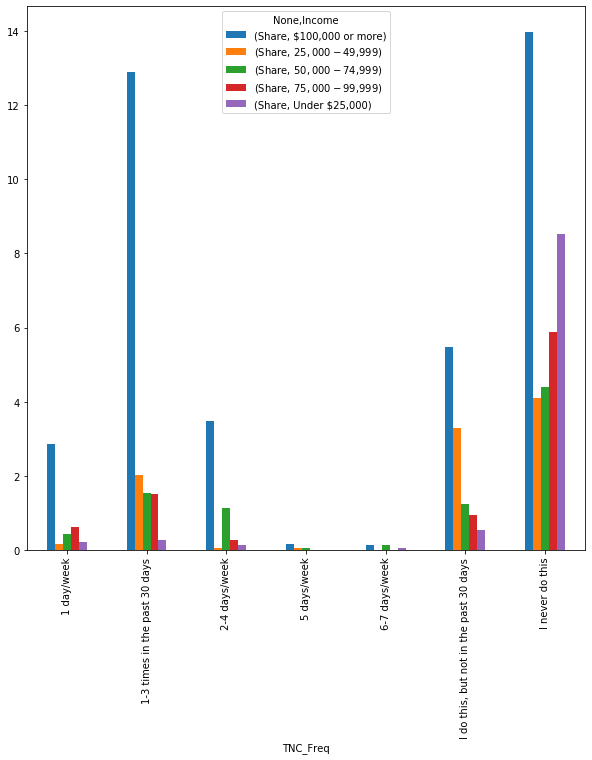

In [38]:
#df4.plot.bar()
df3.groupby(by=["TNC_Freq", "Income"]).mean().unstack().plot.bar(figsize=(10, 10))

In [39]:
df3.groupby(by=["TNC_Freq", "Income"]).mean().unstack()

Share                  \
Income                                 $100,000 or more $25,000-$49,999   
TNC_Freq                                                                  
1 day/week                                     2.871358        0.175671   
1-3 times in the past 30 days                 12.905548        2.025464   
2-4 days/week                                  3.484135        0.055523   
5 days/week                                    0.168566        0.041045   
6-7 days/week                                  0.144493        0.001492   
I do this, but not in the past 30 days         5.481302        3.299640   
I never do this                               13.967396        4.112361   

                                                                        \
Income                                 $50,000-$74,999 $75,000-$99,999   
TNC_Freq                                                                 
1 day/week                                    0.432371        0.632806   
1-3 times in the past 30 days                 1.535299        1.502598   
2-4 days/week                                 1.127794        0.259832   
5 days/week                                   0.057207        0.000667   
6-7 days/week                                 0.135708        0.003713   
I do this, but not in the past 30 days        1.243792        0.955544   
I never do this                               4.404047        5.882464   

                                                      
Income                                 Under $25,000  
TNC_Freq                                              
1 day/week                                  0.205870  
1-3 times in the past 30 days               0.269174  
2-4 days/week                               0.142887  
5 days/week                                 0.000000  
6-7 days/week                               0.043143  
I do this, but not in the past 30 days      0.544702  
I never do this                             8.526208

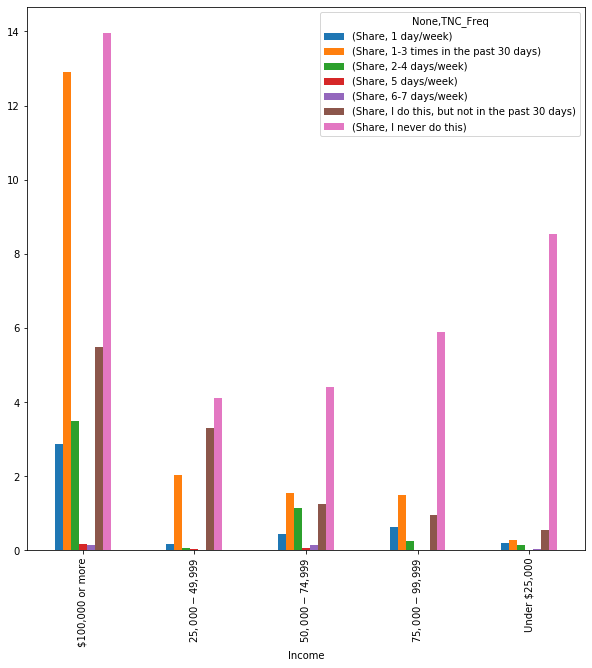

In [40]:
df3.pivot("Income", "TNC_Freq").plot.bar(figsize=(10, 10))

In [41]:
#by education
def get_table(newMobility_variable,newMobility_variable_name,variable,variable_name):
    person_detail_df = lookup_codes(person_detail_Seattle,newMobility_variable,newMobility_variable_name)
    person_detail_df2 = lookup_codes(person_detail_df,variable, variable_name)
    df =person_detail_df2.groupby([variable_name,newMobility_variable_name]).sum()['hh_wt_2019'].reset_index()
    df['Share'] = 0
    for i in range(0,len(df.index)):
        df.iloc[i,3] =df.iloc[i,2]/ (df['hh_wt_2019'].sum())*100
    df=df[df[variable_name] != 'Prefer not to answer']
    df=df[df[newMobility_variable_name] != 'Missing:Skip logic']
    df=df[df[newMobility_variable_name] != 'Missing: Non-response']
    return df

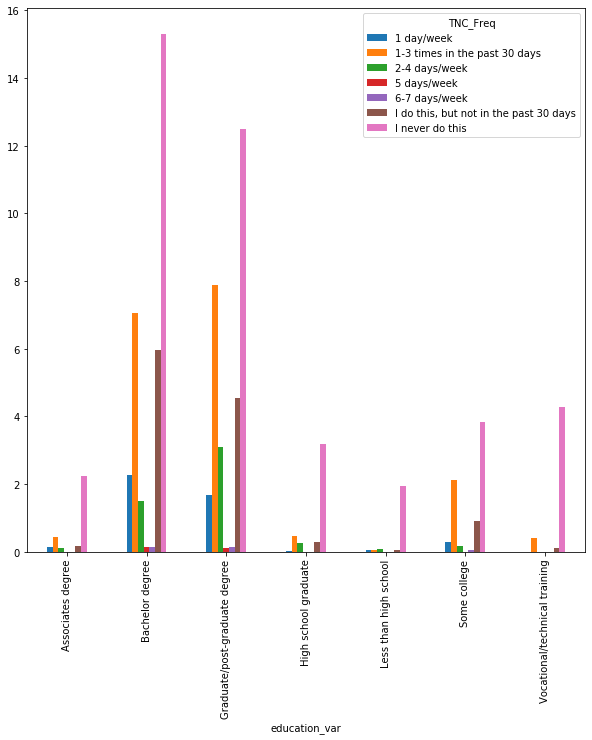

In [42]:
education_seattle=get_table('mode_freq_5','TNC_Freq','education','education_var')
education_seattle.pivot('education_var', "TNC_Freq","Share").plot.bar(figsize=(10, 10))

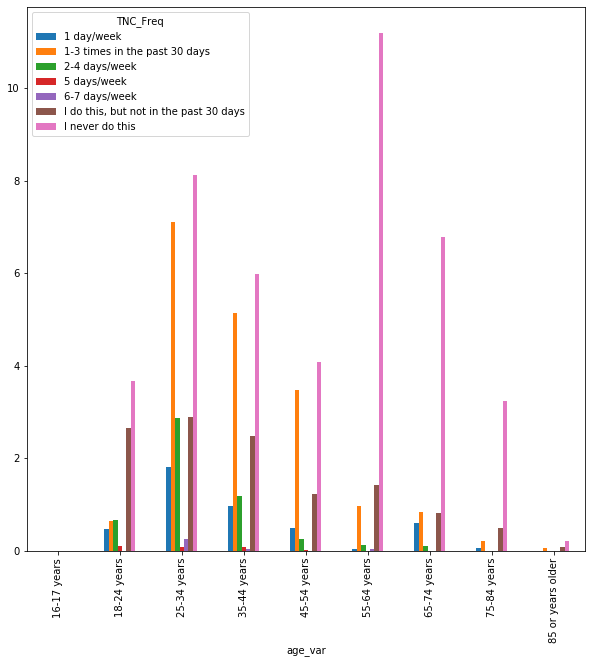

In [43]:
#Age Group-TNC
education_seattle=get_table('mode_freq_5','TNC_Freq','age','age_var')
education_seattle.pivot('age_var', "TNC_Freq","Share").plot.bar(figsize=(10, 10))

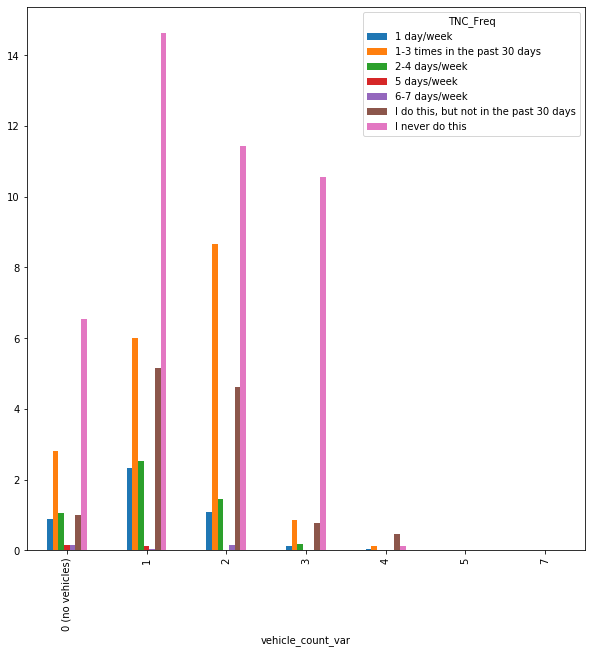

In [44]:
#Auto Ownership-TNC
autoOwn_seattle=get_table('mode_freq_5','TNC_Freq','vehicle_count','vehicle_count_var')
autoOwn_seattle.pivot('vehicle_count_var', "TNC_Freq","Share").plot.bar(figsize=(10, 10))

In [45]:
#Number of Children-TNC
def get_table_quant(newMobility_variable,newMobility_variable_name,variable):
    person_detail_df = lookup_codes(person_detail_Seattle,newMobility_variable,newMobility_variable_name)
    #person_detail_df2 = lookup_codes(person_detail_df,variable, variable_name)
    df =person_detail_df.groupby([variable,newMobility_variable_name]).sum()['hh_wt_2019'].reset_index()
    df['Share'] = 0
    for i in range(0,len(df.index)):
        df.iloc[i,3] =df.iloc[i,2]/ (df['hh_wt_2019'].sum())*100
    df=df[df[variable] != 'Prefer not to answer']
    df=df[df[newMobility_variable_name] != 'Missing:Skip logic']
    df=df[df[newMobility_variable_name] != 'Missing: Non-response']
    return df



C:\Users\pbutrina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


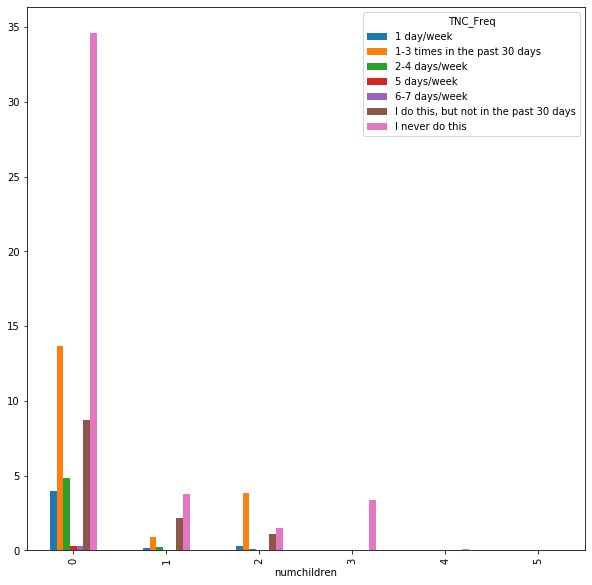

In [46]:
children_seattle=get_table_quant('mode_freq_5','TNC_Freq','numchildren')
children_seattle.pivot('numchildren', "TNC_Freq","Share").plot.bar(figsize=(10, 10))

In [47]:
#by race
race_seattle=get_table('mode_freq_5','TNC_Freq','race','race_var')
#race_seattle.pivot('race_var', "TNC_Freq","Share").plot.bar(figsize=(10, 10))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
person_detail_Seattle[person_detail_Seattle.]